## 230B hw2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
from commpy.filters import rrcosfilter

## Question 1: visualization of Nyquist criterion using raised cosine pulse shape

In [2]:
# Parameters for the RRC filter
num_taps = 1001 # filter length
fs = 10  # sampling frequency (Hz)
Ts = 1  # symbol period
beta = 0.5  # roll-off factor

# Generate the raised cosine pulse
t = np.linspace(-num_taps/(2*fs), num_taps/(2*fs), num_taps)
h_rc = np.sinc(t/Ts) * np.cos(np.pi * beta * t/Ts) / (1 - (2 * beta * t/Ts)**2)
h_rc[np.abs(2 * beta * t/Ts) == 1] = np.pi / 4 * np.sinc(1 / (2 * beta))

# Compute the Fourier Transform of the RRC pulse
freq = np.linspace(-0.5 * fs, 0.5 * fs, len(h_rc))
fft_rc = fftshift(np.abs(fft(h_rc)))

# %matplotlib inline
%matplotlib qt
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, h_rc)
plt.title("rc pulse")
plt.xlabel("time")
plt.xlim(-5, 5)
plt.ylabel("amplitude")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(freq, fft_rc)
plt.title("FT of rc pulse")
plt.xlabel("frequency")
plt.ylabel("magnitude")
# plt.xlim(-2, 2)
plt.grid()

plt.tight_layout()
plt.show()

## Question 2: spectral leakage of sinc vs. raised cosine pulse shapes

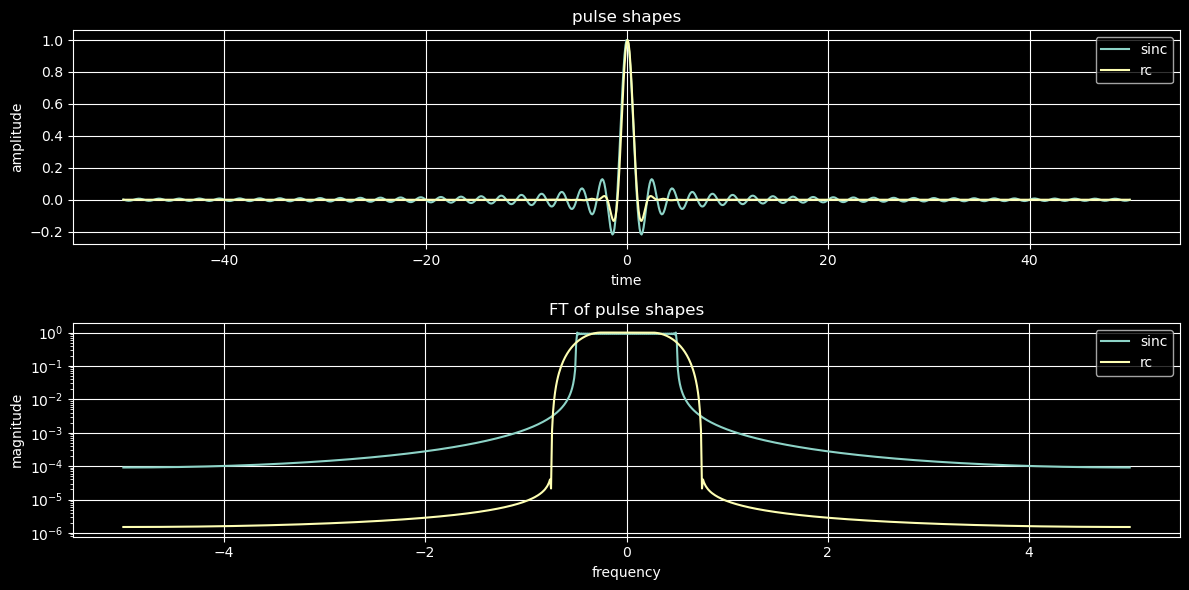

In [17]:
# 2 sinc

n = 1001 # number of samples
t = np.linspace(-n/2, n/2, n) # time vector
fs = 10 # sampling frequency (Hz)
sps = 1 # symbol frequency (in Hz)
beta = 0.5
freq = np.linspace(-0.5 * fs, 0.5 * fs, n)

t, p_rrc = rrcosfilter(n, beta, 1/sps, fs)
p_rc = np.convolve(p_rrc, p_rrc, 'same')
p_sinc = np.sinc(t)

p_sinc = p_sinc / np.max(p_sinc)
p_rc = p_rc / np.max(p_rc) 

fft_sinc = fftshift(np.abs(fft(p_sinc)))
fft_rc = fftshift(np.abs(fft(p_rc)))

fft_sinc = fft_sinc / np.max(fft_sinc)
fft_rc = fft_rc / np.max(fft_rc)

# %matplotlib qt
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, p_sinc, label='sinc')
plt.plot(t, p_rc, label='rc')
plt.title("pulse shapes")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(freq, fft_sinc, label='sinc')
plt.plot(freq, fft_rc, label='rc')
plt.title("FT of pulse shapes")
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.yscale('log')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Question 3: M-QAM constellation


## Question 4: PAM modulation

In [18]:
# part a

def pam_mod(b, M):
    """
    input: sequence of bits b and modulation order M
    output: modulated signal of symbols s according to rule
    """

    if (M != 2) and (M != 4):
        raise ValueError("M must be 2 or 4")
    
    if M == 2:
        s = [-1 if b[i] == 0 else 1 for i in range(len(b))]
    elif M == 4:
        if len(b) % 2 != 0: 
            raise ValueError("length of bits must be even for 4-PAM")
        mapping = {
            (0, 0): -3,
            (0, 1): -1,
            (1, 1): 1,
            (1, 0): 3
        }
        s = [mapping[(b[i], b[i+1])] for i in range(0, len(b), 2)]

    return s

def pam_demod(s, M): 
    """
    input: sequence of symbols s and modulation order M
    output: demodulated signal of bits b according to rule
    """

    if (M != 2) and (M != 4):
        raise ValueError("M must be 2 or 4")
    
    if M == 2:
        b = [0 if s[i] < 0 else 1 for i in range(len(s))]
    elif M == 4:
        mapping = {
            -3: (0, 0),
            -1: (0, 1),
            1: (1, 1),
            3: (1, 0)
        }
        b = [mapping[min(mapping.keys(), key=lambda x: abs(s[i] - x))][j] for i in range(len(s)) for j in range(2)]
        
    return b

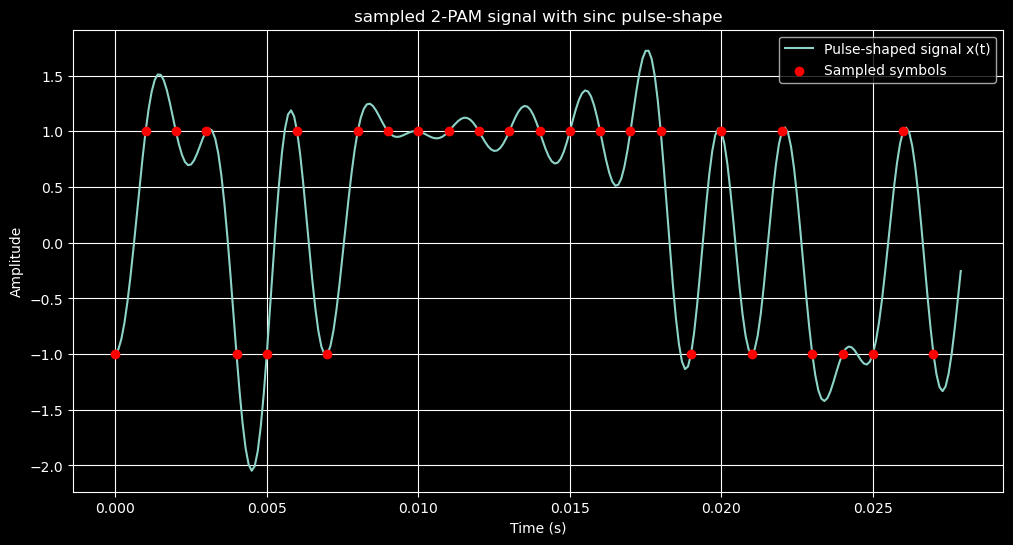

b_n_recovered == b_n? True


In [19]:
# part b: 2-PAM with sinc pulse shape

sps = 1000 # symbols per second
fs = sps*10 # sampling frequency (Hz)
T = 1/sps

b_n = [0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,1,0]
s_n = pam_mod(b_n, 2)
x_t = np.zeros(len(s_n)*int(fs/sps))
t = np.arange(0, len(x_t)) / fs
for i in range(len(s_n)):
    x_t = x_t + s_n[i] * np.sinc((t-i*T)/T)

s_times = np.arange(len(s_n)) * T
s_idx = (s_times * fs).astype(int)
s_n_recovered = x_t[s_idx]
b_n_recovered = pam_demod(s_n_recovered, 2)

# %matplotlib qt
plt.figure(figsize=(12, 6))
plt.plot(t, x_t, label="Pulse-shaped signal x(t)")
plt.scatter(s_times, s_n_recovered, color="red", label="Sampled symbols", zorder=5)
plt.title("sampled 2-PAM signal with sinc pulse-shape")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

print("b_n_recovered == b_n?", b_n_recovered == b_n)

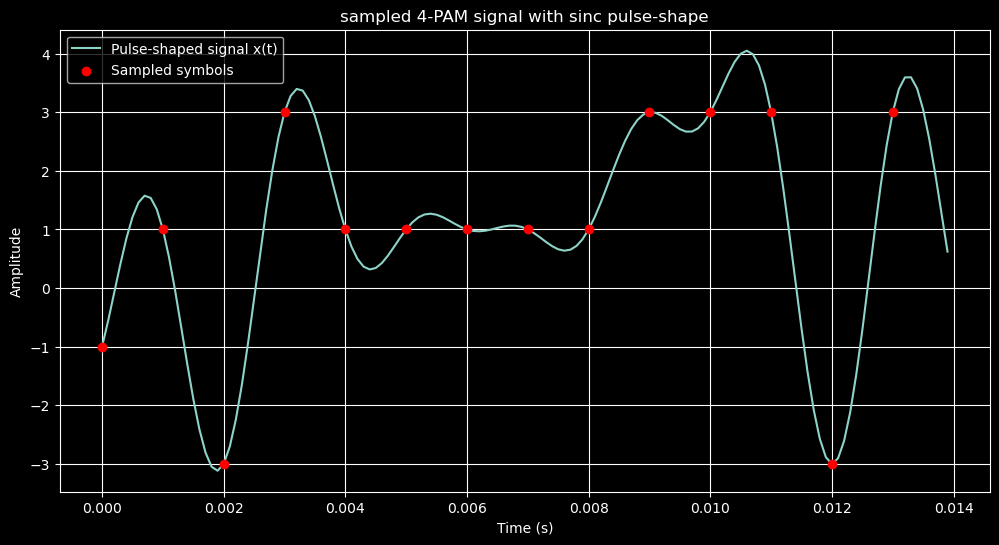

b_n_recovered == b_n? True


In [20]:
# part c: 4-PAM with sinc pulse shape
sps = 1000 # symbols per second
fs = sps*10 # sampling frequency (Hz)
T = 1/sps

b_n = [0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,1,0]
s_n = pam_mod(b_n, 4)
x_t = np.zeros(len(s_n)*int(fs/sps))
t = np.arange(0, len(x_t)) / fs
for i in range(len(s_n)):
    x_t = x_t + s_n[i] * np.sinc((t-i*T)/T)

s_times = np.arange(len(s_n)) * T
s_idx = (s_times * fs).astype(int)
s_n_recovered = x_t[s_idx]
b_n_recovered = pam_demod(s_n_recovered, 4)

# %matplotlib qt
plt.figure(figsize=(12, 6))
plt.plot(t, x_t, label="Pulse-shaped signal x(t)")
plt.scatter(s_times, s_n_recovered, color="red", label="Sampled symbols", zorder=5)
plt.title("sampled 4-PAM signal with sinc pulse-shape")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

print("b_n_recovered == b_n?", b_n_recovered == b_n)

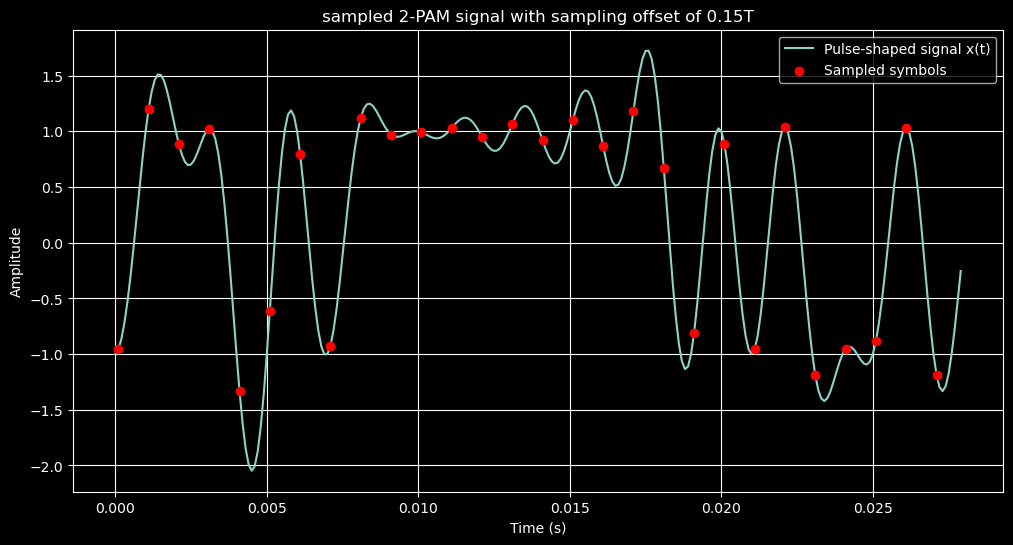

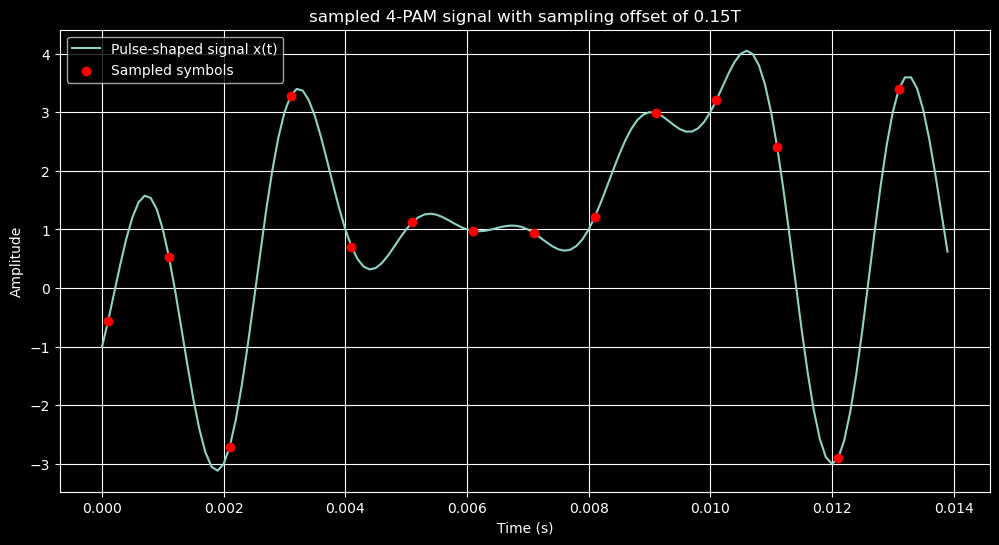

b_n_2pam_recovered == b_n? True
b_n_4pam_recovered == b_n? True


In [22]:
# part d: introduce sampling offset
sps = 1000 # symbols per second
fs = sps*10 # sampling frequency (Hz)
T = 1/sps

b_n = [0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,1,0]
s_n_2pam = pam_mod(b_n, 2)
x_t_2pam = np.zeros(len(s_n_2pam)*int(fs/sps))
t_2pam = np.arange(0, len(s_n_2pam)*int(fs/sps)) / fs
for i in range(len(s_n_2pam)):
    x_t_2pam = x_t_2pam + s_n_2pam[i] * np.sinc((t_2pam-i*T)/T)
s_n_4pam = pam_mod(b_n, 4)
t_4pam = np.arange(0, len(s_n_4pam)*int(fs/sps)) / fs
x_t_4pam = np.zeros(len(s_n_4pam)*int(fs/sps))
for i in range(len(s_n_4pam)):
    x_t_4pam = x_t_4pam + s_n_4pam[i] * np.sinc((t_4pam-i*T)/T)

delta_t = 0.15 * T # sampling offset
s_idx_2pam = (np.arange(len(s_n_2pam)) * T*fs).astype(int) + int(round(delta_t*fs))
s_times_2pam = t_2pam[s_idx_2pam]
s_n_2pam_recovered = x_t_2pam[s_idx_2pam]
b_n_2pam_recovered = pam_demod(s_n_2pam_recovered, 2)
s_idx_4pam = (np.arange(len(s_n_4pam)) * T*fs).astype(int) + int(round(delta_t*fs))
s_times_4pam = t_4pam[s_idx_4pam]
s_n_4pam_recovered = x_t_4pam[s_idx_4pam]
b_n_4pam_recovered = pam_demod(s_n_4pam_recovered, 4)

# %matplotlib qt
plt.figure(figsize=(12, 6))
plt.plot(t_2pam, x_t_2pam, label="Pulse-shaped signal x(t)")
plt.scatter(s_times_2pam, s_n_2pam_recovered, color="red", label="Sampled symbols", zorder=5)
plt.title("sampled 2-PAM signal with sampling offset of 0.15T")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

# %matplotlib qt
plt.figure(figsize=(12, 6))
plt.plot(t_4pam, x_t_4pam, label="Pulse-shaped signal x(t)")
plt.scatter(s_times_4pam, s_n_4pam_recovered, color="red", label="Sampled symbols", zorder=5)
plt.title("sampled 4-PAM signal with sampling offset of 0.15T")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

print("b_n_2pam_recovered == b_n?", b_n_2pam_recovered == b_n)
print("b_n_4pam_recovered == b_n?", b_n_4pam_recovered == b_n)
